In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
import time
import seaborn as sns
%matplotlib inline

## Load Data

In [29]:
# Load data
start = time.time() 
train_data = pd.read_csv('../input/train.csv')
train_size=train_data.shape[0]
print "Loading train data finished in {:0.4}s".format(time.time() - start) 

start = time.time() 
test_data = pd.read_csv('../input/test.csv')
print "Loading test data finished in {:0.4}s".format(time.time() - start)     

Loading train data finished in 2.634s
Loading test data finished in 1.617s


## Basic information of dataset

In [12]:
print 'train_data: ', train_data.shape
print 'test_data: ', test_data.shape

train_data:  (188318, 132)
test_data:  (125546, 131)


#### Show categorical and numerical columns

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [19]:
data_types = train.dtypes  
cat_cols = list(data_types[data_types=='object'].index)
num_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)

id_col = 'id'
target_col = 'loss'
num_cols.remove('id')
num_cols.remove('loss')

print "Categorical features:\n", cat_cols, '\n'
print "Numerical features:\n", num_cols, '\n'
print "ID: {0}, target: {1}".format(id_col, target_col)

Categorical features:
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat1

#### Testing on missing values

In [24]:
train.isnull().values.any()

False

## Statistic summary of the numerical features

#### Statistical description

In [30]:
print train.describe()

                  id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

#### Skewness of the distribution

In [28]:
print train.skew()

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

#### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012AFB518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F553B00>]], dtype=object)

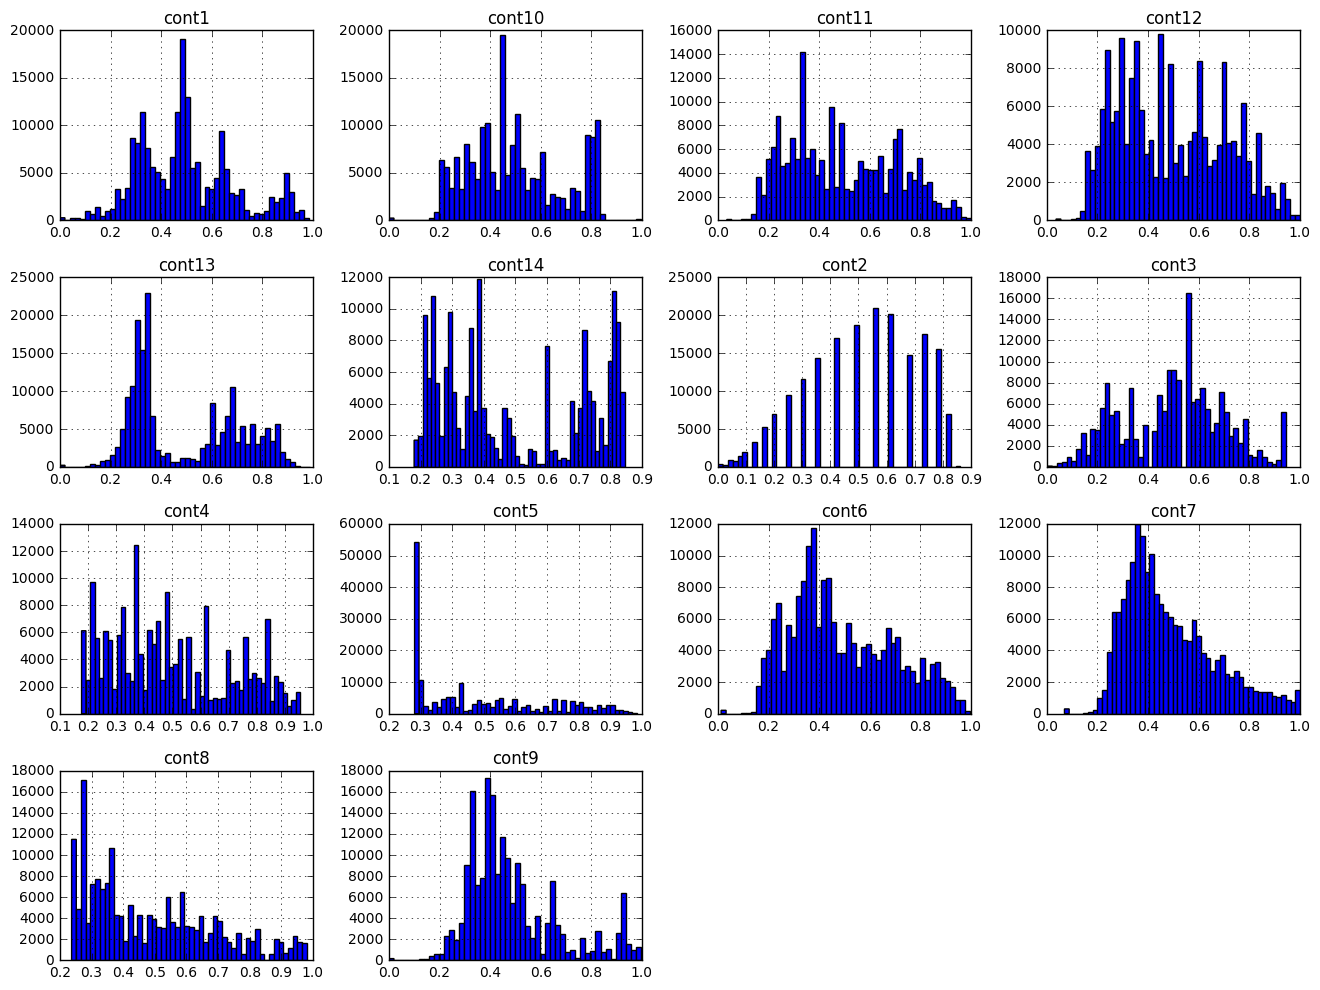

In [38]:
train[num_cols].hist(bins=50, figsize=(16,12))

#### Feature Correlation

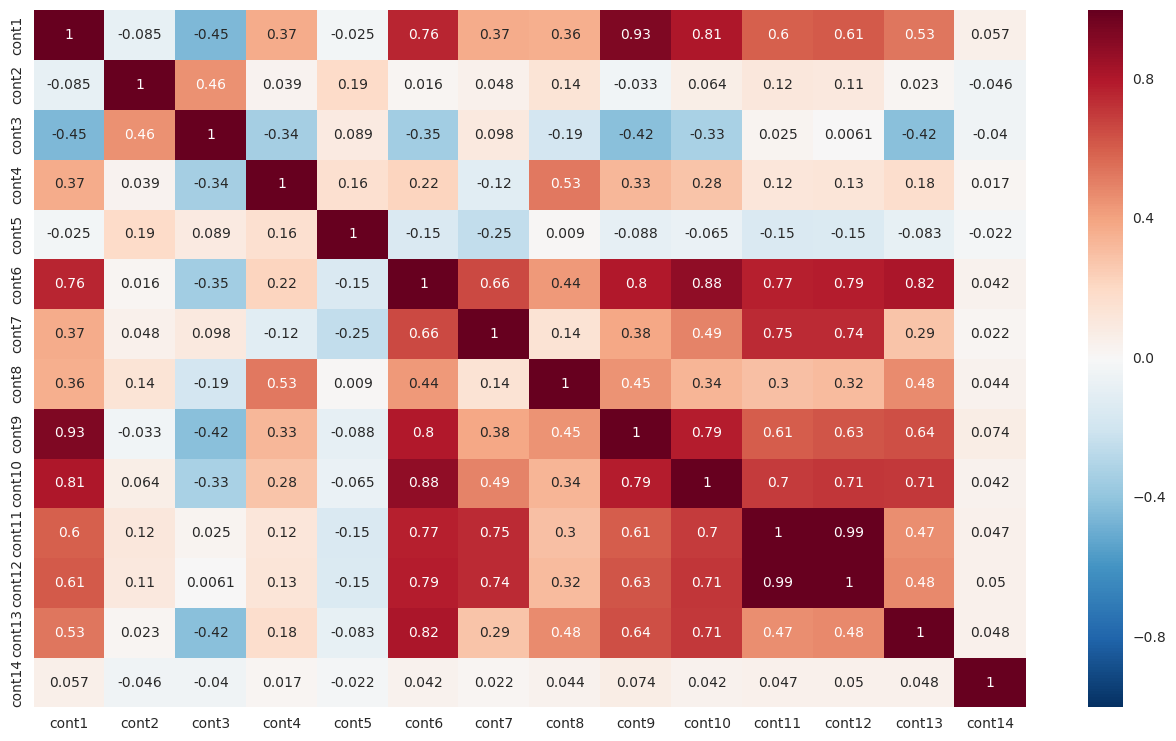

In [41]:
plt.subplots(figsize=(16,9))
correlation = train[num_cols].corr()
sns.heatmap(correlation, annot=True)

## Summary of the categorical features

#### Unique values in categorical features

In [48]:
cat_uniques = []
for cat in cat_cols:
    cat_uniques.append(len(train[cat].unique()))

uniq_values_in_categories = pd.DataFrame.from_items([('categories', cat_cols), ('unique_values', cat_uniques)])
uniq_values = uniq_values_in_categories.groupby('unique_values').count()
uniq_values.sort_values(by='categories', inplace=True, ascending=False)
uniq_values.reset_index(inplace=True)
print uniq_values

    unique_values  categories
0               2          72
1               4          12
2               3           4
3               7           4
4               5           3
5               8           3
6              20           2
7              19           2
8              17           2
9              16           2
10             15           1
11             13           1
12             11           1
13              9           1
14             23           1
15             51           1
16             61           1
17             84           1
18            131           1
19            326           1


## Target Feature

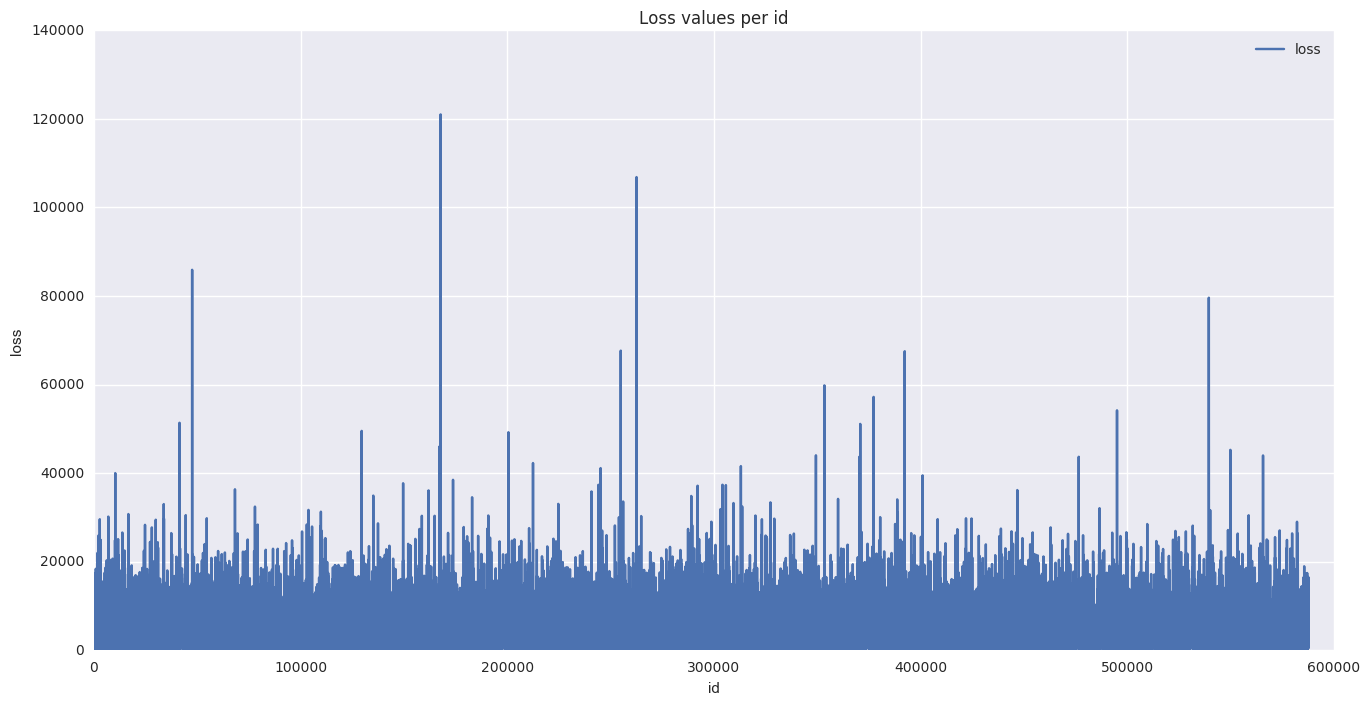

In [49]:
plt.figure(figsize=(16,8))
plt.plot(train['id'], train['loss'])
plt.title('Loss values per id')
plt.xlabel('id')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Skewness of the loss

In [72]:
print 'loss\t\t:',train['loss'].skew()
print 'log_loss + 1\t:',np.log(train['loss']+1).skew()
print 'log_loss + 50\t:',np.log(train['loss']+50).skew()
print 'log_loss + 100\t:',np.log(train['loss']+100).skew()
print 'log_loss + 200\t:',np.log(train['loss']+200).skew()

loss		: 3.79495837754
log_loss + 1	: 0.0966195895032
log_loss + 50	: 0.166695282267
log_loss + 100	: 0.218153856509
log_loss + 200	: 0.301411340599


#### Histogram of the loss and log-transform for the loss.

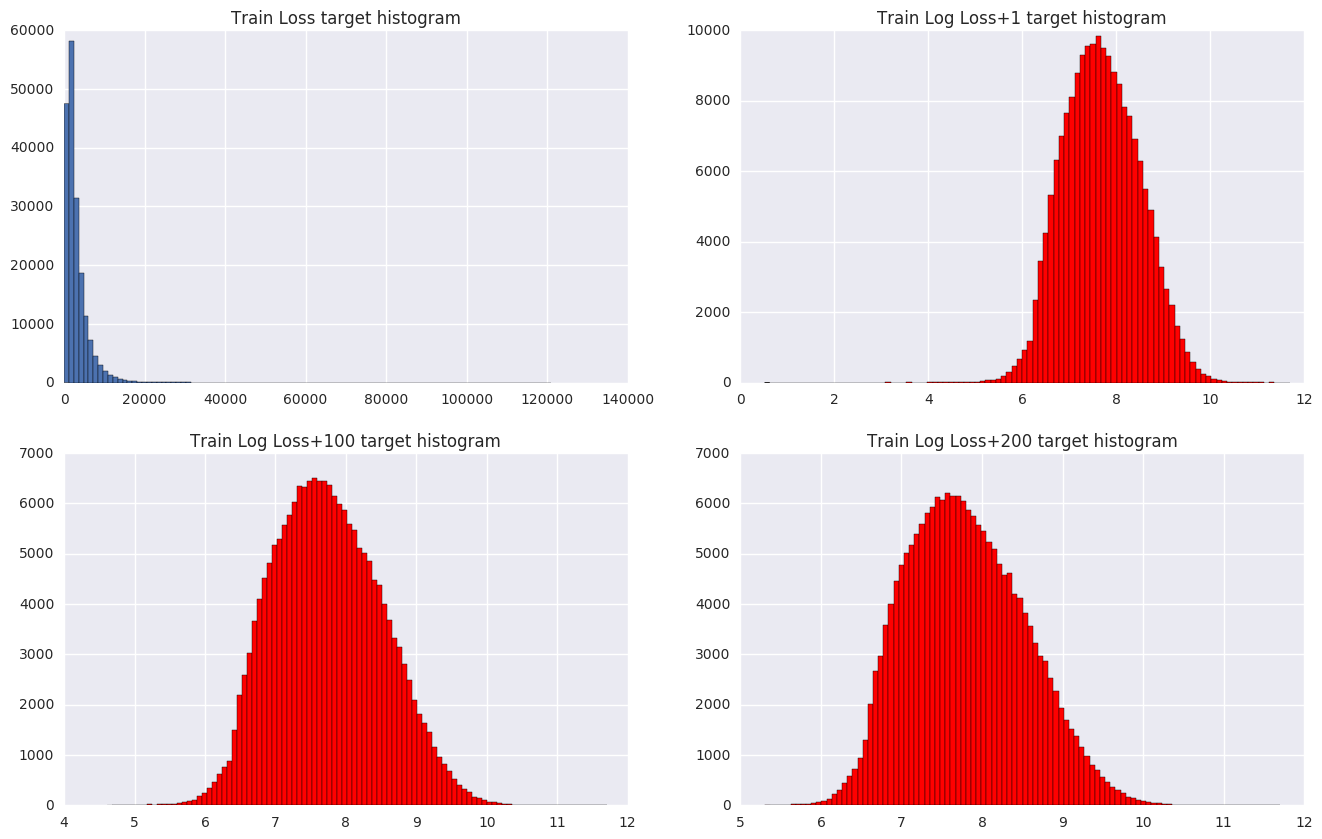

In [74]:
fig, [(ax1, ax2),(ax3, ax4)] = plt.subplots(2,2)
fig.set_size_inches(16,10)
ax1.hist(train['loss'], bins=100)
ax1.set_title('Train Loss target histogram')
ax1.grid(True)
ax2.hist(np.log(train['loss']+1), bins=100, color='r')
ax2.set_title('Train Log Loss+1 target histogram')
ax2.grid(True)
ax3.hist(np.log(train['loss']+100), bins=100, color='r')
ax3.set_title('Train Log Loss+100 target histogram')
ax3.grid(True)
ax4.hist(np.log(train['loss']+200), bins=100, color='r')
ax4.set_title('Train Log Loss+200 target histogram')
ax4.grid(True)
plt.show()

#### Visualize both train and test dataset using PCA. 
#### Project multidimensional dataset (130D) to 2D.

In [75]:
train_d = train.drop(['id','loss'], axis=1)
test_d = test.drop(['id'], axis=1)
train_d['Target'] = 1
test_d['Target'] = 0
full_data = pd.concat((train_d, test_d))

In [78]:
LBL = preprocessing.LabelEncoder()
start=time.time()
for cat_col in cat_cols:
#     print ("Factorize feature %s" % (cat))
    full_data[cat_col] = LBL.fit_transform(full_data[cat_col])
print ('Label enconding finished in %f seconds' % (time.time()-start))

Label enconding finished in 29.577000 seconds


In [82]:
# Shuffle train and test
full_data = full_data.iloc[np.random.permutation(len(full_data))]

# Run PCA transformation
X = full_data.iloc[:, :130]
y = full_data.iloc[:, 130:]
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

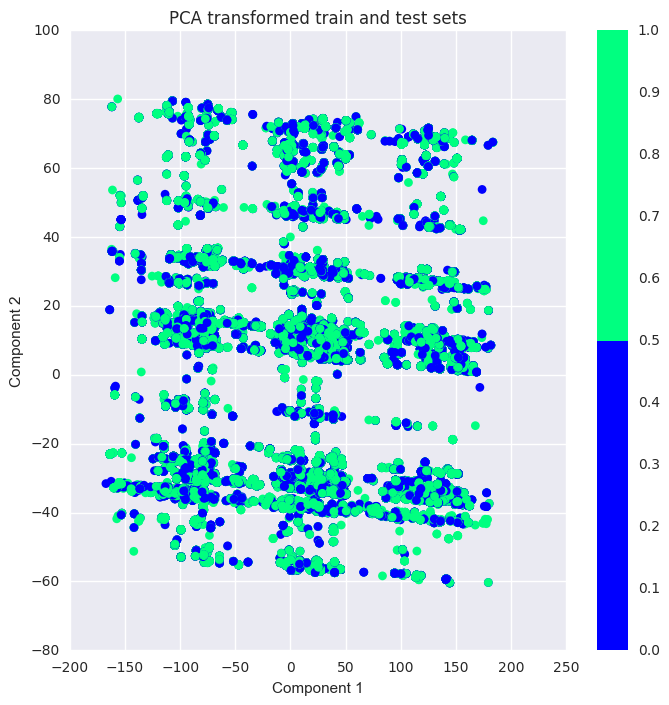

In [84]:
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.array(y), 
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('winter', 2))
plt.title('PCA transformed train and test sets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()